In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Timeline
from pyecharts.globals import ChartType, SymbolType
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Map
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

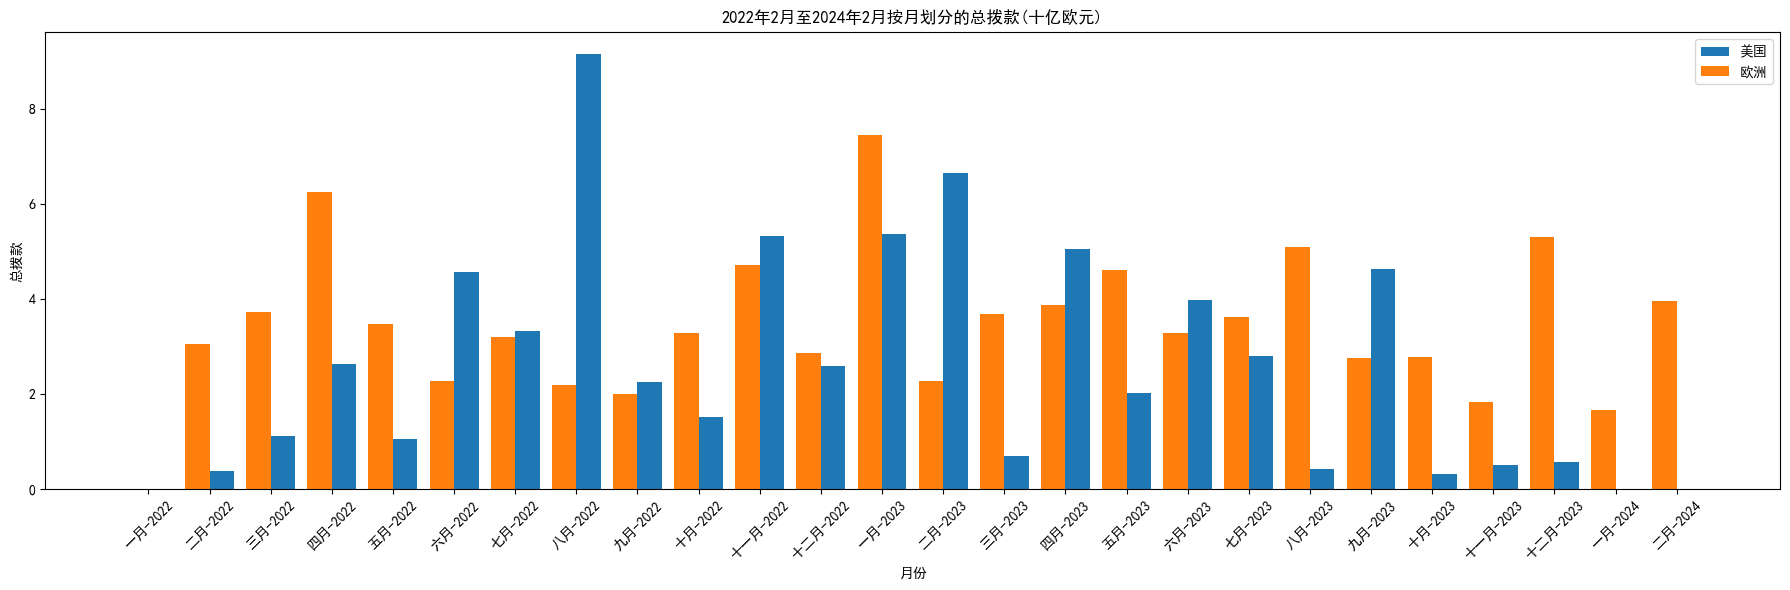

In [4]:
#美国与欧洲对乌克兰的拨款(月份)
# 月份
months = ["一月-2022", "二月-2022", "三月-2022", "四月-2022", "五月-2022", "六月-2022", "七月-2022", "八月-2022", "九月-2022", "十月-2022", "十一月-2022", "十二月-2022",
          "一月-2023", "二月-2023", "三月-2023", "四月-2023", "五月-2023", "六月-2023", "七月-2023", "八月-2023", "九月-2023", "十月-2023", "十一月-2023", "十二月-2023",
          "一月-2024", "二月-2024"]

# 美国的拨款金额
us = [0.00, 0.38, 1.13, 2.63, 1.06, 4.57, 3.34, 9.16, 2.25, 1.52, 5.34, 2.59,
              5.37, 6.66, 0.70, 5.06, 2.03, 3.99, 2.80, 0.42, 4.63, 0.33, 0.51, 0.58, 0.00, 0.00]

# 欧洲的拨款金额
eu = [0.00, 3.05, 3.74, 6.26, 3.48, 2.29, 3.20, 2.20, 2.00, 3.29, 4.73, 2.86,
              7.45, 2.28, 3.70, 3.88, 4.62, 3.30, 3.62, 5.10, 2.76, 2.79, 1.84, 5.30, 1.66, 3.96]

# 月份序号
x = np.arange(len(months))

# 绘图
plt.figure(figsize=(18, 6))
plt.bar(x + 0.2 , us, width=0.4, label='美国')
plt.bar(x - 0.2 , eu, width=0.4, label='欧洲')
plt.title('2022年2月至2024年2月按月划分的总拨款(十亿欧元)')
plt.xlabel('月份')
plt.ylabel('总拨款')
plt.xticks(x, months, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# 北约东扩一览

# 北约成员国数据
nato_countries = {
    1949: ["美国", "加拿大", "英国", "法国", "意大利", "比利时", "荷兰", "卢森堡", "挪威", "丹麦", "冰岛"],
    2004: ["美国", "加拿大", "英国", "法国", "意大利", "比利时", "荷兰", "卢森堡", "挪威", "丹麦", "冰岛", 
           "德国", "西班牙", "葡萄牙", "希腊", "土耳其", "波兰", "匈牙利", "捷克", "保加利亚", "爱沙尼亚", 
           "拉脱维亚", "立陶宛", "罗马尼亚", "斯洛伐克", "斯洛文尼亚"],
    2022: ["美国", "加拿大", "英国", "法国", "意大利", "比利时", "荷兰", "卢森堡", "挪威", "丹麦", "冰岛", 
           "德国", "西班牙", "葡萄牙", "希腊", "土耳其", "波兰", "匈牙利", "捷克", "保加利亚", "爱沙尼亚", 
           "拉脱维亚", "立陶宛", "罗马尼亚", "斯洛伐克", "斯洛文尼亚", "阿尔巴尼亚", "克罗地亚", "黑山", 
           "北马其顿"]
}

# 国家名称转换为中文
country_name = {
    "United States": "美国", "Canada": "加拿大", "United Kingdom": "英国", "France": "法国", "Italy": "意大利", 
    "Belgium": "比利时", "Netherlands": "荷兰", "Luxembourg": "卢森堡", "Norway": "挪威", "Denmark": "丹麦", 
    "Iceland": "冰岛", "Germany": "德国", "Spain": "西班牙", "Portugal": "葡萄牙", "Greece": "希腊", 
    "Turkey": "土耳其", "Poland": "波兰", "Hungary": "匈牙利", "Czech Republic": "捷克", "Bulgaria": "保加利亚", 
    "Estonia": "爱沙尼亚", "Latvia": "拉脱维亚", "Lithuania": "立陶宛", "Romania": "罗马尼亚", "Slovakia": "斯洛伐克", 
    "Slovenia": "斯洛文尼亚", "Albania": "阿尔巴尼亚", "Croatia": "克罗地亚", "Montenegro": "黑山", 
    "North Macedonia": "北马其顿"
}

# 创建时间线
timeline = Timeline()

for year in [1949, 2004, 2022]:
    country_list = nato_countries[year]
    
    map_chart = (
        Map()
        .add(
            is_map_symbol_show=False, name_map=country_name,
            series_name="北约成员国",
            data_pair=[(country, 1) for country in country_list],
            maptype="world",
            zoom=2 #觉得图小调这个
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title=f"北约东扩示意图 ({year})"),
            visualmap_opts=opts.VisualMapOpts(is_show=False),
            tooltip_opts=opts.TooltipOpts(is_show=True)
        )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False)) #隐藏国名
    )
    
    timeline.add(map_chart, f"{year}")

timeline.render_notebook()

In [6]:
# 乌克兰国土被占领情况
# 比较粗糙(因为无法量化数据)，越红代表该地区被占领的面积越多

data = [
    ("Donetsk Oblast", 43),  # 顿涅茨克
    ("Luhansk Oblast", 100),  # 卢甘斯克
    ("Autonomous Republic of Crimea", 100),  ("Sevastopol", 100), # 克里米亚
    ("Zaporizhia Oblast", 73),# 扎波罗热
    ("Kherson Oblast", 97),# 赫尔松
    ("Kharkiv Oblast",5)# 哈尔科夫
    
]

# 绘制地图
map_chart = (
    Map()
    .add("", data, maptype="乌克兰", is_map_symbol_show=False)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="乌克兰地图"),
        visualmap_opts=opts.VisualMapOpts(max_=100),
    )
)
map_chart.render_notebook()

In [7]:
#各国对乌克兰的援助情况(部分)

# 数据
countries = ['美国', '欧盟机构', '德国', '英国','日本','加拿大','丹麦','荷兰','波兰','法国','瑞典','挪威']
military_aid = [43.08,0,10.04,5.27,0.06,1.93,4.78,3.85,3,2.69,2.74,0.84]
humanitarian_aid = [2.53,2.29,3.05,0.55,1.02,0.37,0.24,0.57,0.38,0.36,0.16,0.35]
economic_aid = [21.47,27.68,1.41,3.28,4.84,3.45,0.12,0.72,0.95,0.8,0.34,0.77]

# 绘制柱状图
bar = (
    Bar()
    .add_xaxis(countries)
    .add_yaxis("军事援助", military_aid,stack='stack1')
    .add_yaxis("人道主义援助", humanitarian_aid,stack='stack1')
    .add_yaxis("经济援助", economic_aid,stack='stack1')
    .set_global_opts(
        title_opts=opts.TitleOpts(title="政府对乌克兰的援助", subtitle="按照援助类型分类，单位为十亿欧元"),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="shadow"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)),
        yaxis_opts=opts.AxisOpts(
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
    .reversal_axis() #横置，好看点
)

# 设置柱状图标签显示
# 只有大于1的数据才会显示标签，防止标签挤在一起不好看
bar.set_series_opts(
    label_opts=opts.LabelOpts(
        position="inside",
        formatter=JsCode(
            "function(params) { if (params.value >= 1) {return params.value;} else {return '';}}"
        ),
    )
)
bar.render_notebook()